# EDA of housing data

#  Full exploratory data analysis process to gain insight about a dataset
# Using provided data

# Which factors of the given data correlates most with sold price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data into a dataframe
df = pd.read_csv(r"C:\Users\Jay\Documents\important misc\EIT\EDA_and_regression\raw_house_data.csv",encoding="ISO-8859-1")
print(df.shape)
df.head(5)

(5000, 16)


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


# Investigate the Data

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

# FIll nas with mean and NONE string with 0

In [4]:
df2 = df.dropna()
df2 =  df2.replace('None', 0)
df2.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,0,0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


# Investigating Distributions using scatter_matrix

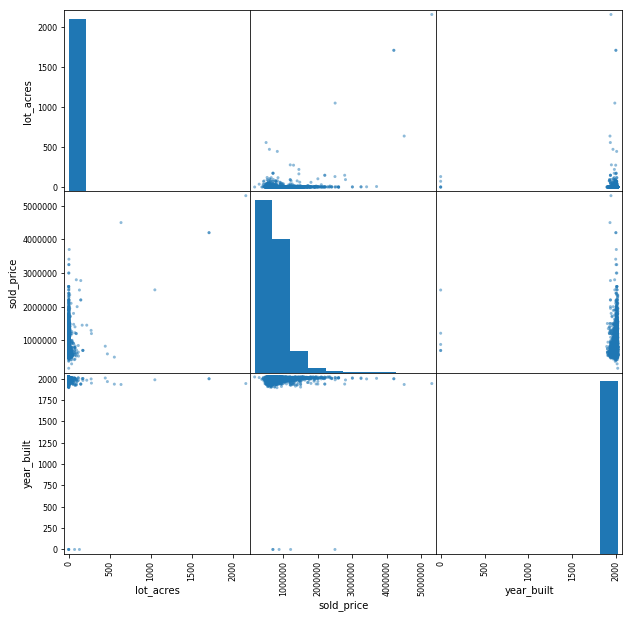

In [5]:

pd.plotting.scatter_matrix(df[['lot_acres', 'sold_price', 'HOA', 'year_built']], figsize=(10,10));

# Create a plot that shows the sold_price Distribution

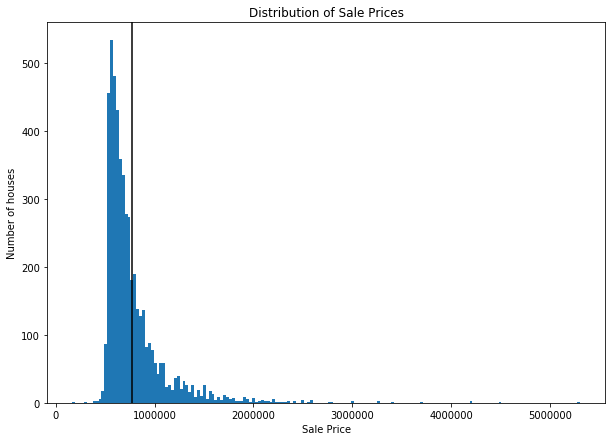

In [6]:

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df2['sold_price'], bins='auto')
ax.set_title('Distribution of Sale Prices')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of houses')
ax.axvline(df2['sold_price'].mean(), color='black');

# Looks like a log normal distribution; most houses in this sample are clustered around $1000000

# Create a plot that shows the bedrooms Distribution

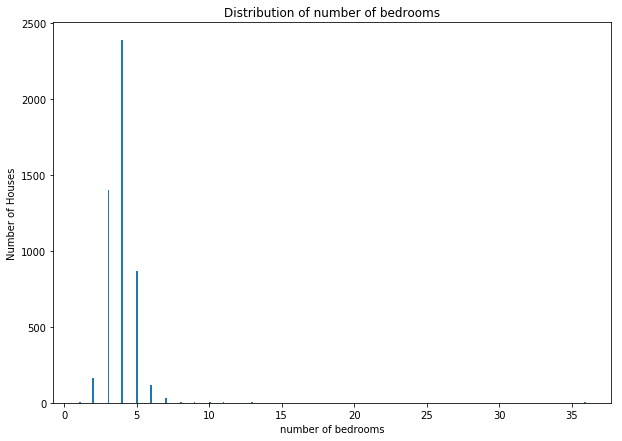

In [7]:


fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(df2['bedrooms'], bins='auto');
ax.set_title('Distribution of number of bedrooms')
ax.set_xlabel('number of bedrooms')
ax.set_ylabel('Number of Houses');

# The number of rooms in houses is approximately normally distributed, 
# with a mean around 4 rooms.

# Create a Box Plot for sold_price

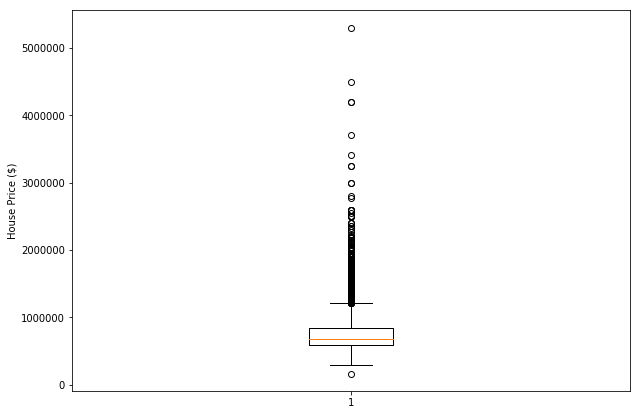

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(df2['sold_price'])
ax.set_ylabel('House Price ($)');

## Investigation Correlations with Sale Price

In [9]:
df2.corr()['sold_price'].sort_values()

zipcode      -0.042956
longitude    -0.037662
year_built   -0.013922
taxes         0.023305
MLS           0.024749
latitude      0.032697
bedrooms      0.115304
lot_acres     0.332357
sold_price    1.000000
Name: sold_price, dtype: float64

# It looks like lot_acres and bedrooms  are most highly correlated with SalePrice.
# These features would be a good place to start for modeling
# Other investigations will vary

# Perform an Exploration of home price by bedrooms

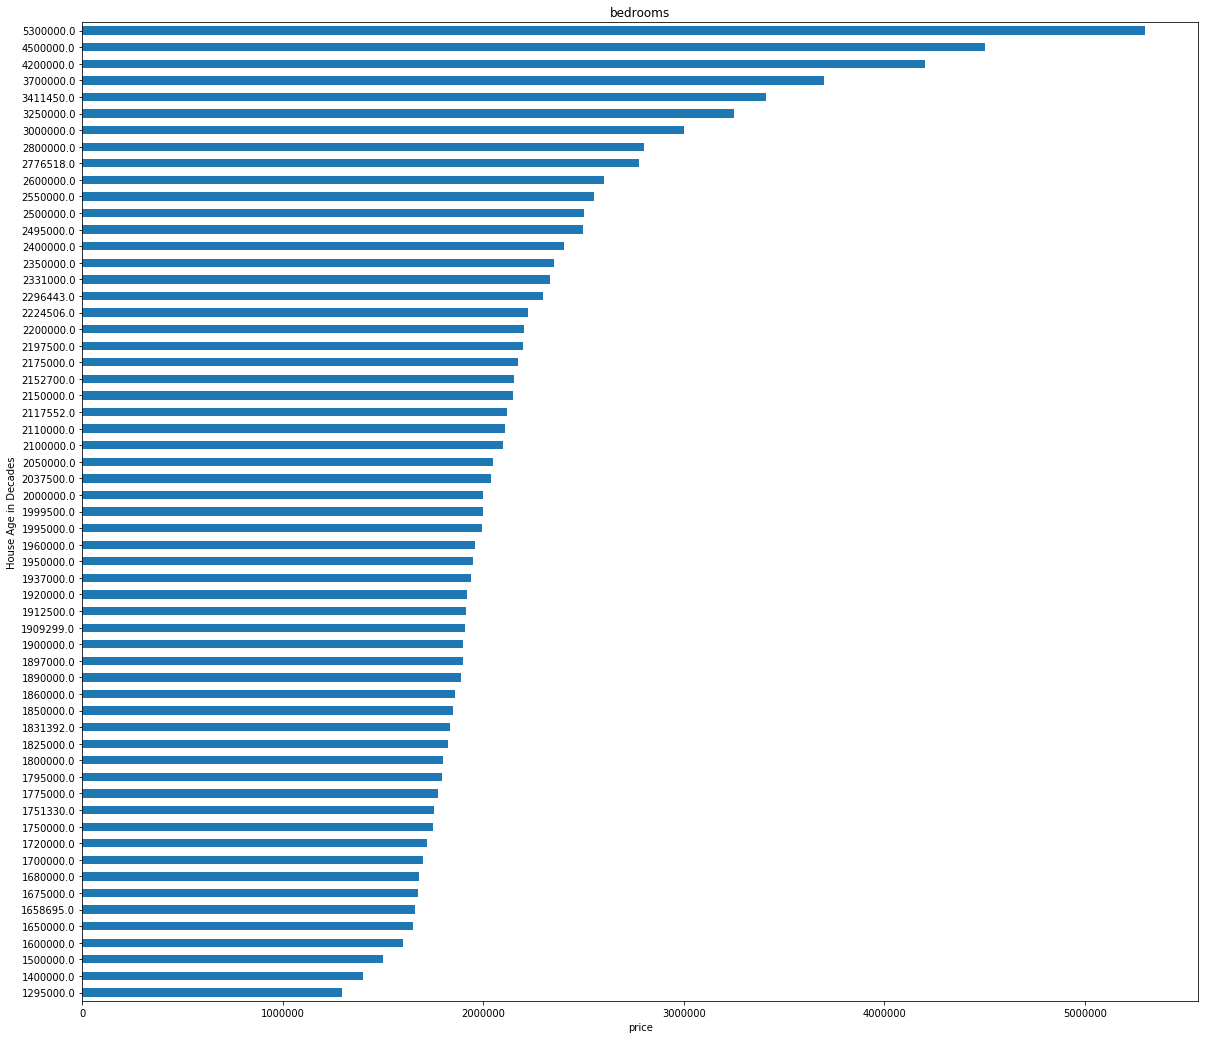

In [10]:

df2['rooms'] = df2['bedrooms'].head(100)
df2['price'] = df2['sold_price'].head(100)
to_plot = df2.groupby('price').sold_price.mean()
to_plot.plot(kind='barh', figsize=(20,18))
plt.ylabel('House Age in Decades')
plt.xlabel('price')
plt.title('bedrooms');


# Price is affected by bedrooms


# Bussiness Problem: can we help home owners see the true value of the homes they want to buy based on year build, by prediciting home price based on year built 

# Regression

## using KNN and Linear regression to see if price is affected by year build

# KNN

In [11]:
y = df2['sold_price'] 
X = df2[['year_built','longitude', 'latitude']]


In [12]:
X.dropna(how = 'all')
type(X)

pandas.core.frame.DataFrame

In [13]:
y.dropna(how = 'all')
type(y)

pandas.core.series.Series

In [14]:
X1 = X.to_numpy()

In [15]:
type(X1)

numpy.ndarray

In [16]:
y1 = y.values
type(y1)

numpy.ndarray

In [17]:
#80 to train 80 percent of X is 4k
#20 to test
print(X1.shape)
print(y1.shape)

(4990, 3)
(4990,)


In [18]:
X_train = X1[:4000]
#print(X_train)
X_test = X1[4000:]
#print(X_test)
X_test.shape
print(X_train)

[[1941.       -110.3782     31.356362]
 [1997.       -111.045371   31.594213]
 [1997.       -111.040707   31.594844]
 ...
 [2010.       -110.978365   31.823326]
 [1963.       -110.888995   32.273159]
 [2004.       -110.860543   32.539054]]


In [19]:
y_train = y1[:4000]
#print(y_train)
y_test = y1[4000:]
#print(y_test)
print(y_train)

[5300000. 4200000. 4200000. ...  600000.  587500.  576000.]


In [20]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(4000, 3)
(4000,)
(990,)
(990, 3)


In [21]:
type(X_test)

numpy.ndarray

In [22]:
type(y_test)

numpy.ndarray

In [23]:
type(X_train)

numpy.ndarray

In [24]:
type(y_train)

numpy.ndarray

In [25]:
X_train

array([[1941.      , -110.3782  ,   31.356362],
       [1997.      , -111.045371,   31.594213],
       [1997.      , -111.040707,   31.594844],
       ...,
       [2010.      , -110.978365,   31.823326],
       [1963.      , -110.888995,   32.273159],
       [2004.      , -110.860543,   32.539054]])

In [26]:
class knnr():
    def fit(self, X,y):
        self.X = X
        self.y = y

    def predict(self, X,K, epsilon = 1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2, axis =1)
            idxt = np.argsort(dist2)[:K] # the top k's
            gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum() # could do it the sum version
            y_hat[i] = gamma_k.dot(self.y[idxt])

        return y_hat

In [27]:
KNN = knnr()

In [28]:
KNN.fit(X_train,y_train)

In [152]:
y_hat = KNN.predict(X_test,1)
print(y_hat)

[ 720000.   635000.   565000.   628000.   560000.   787000.   700000.
  680000.   599900.   625000.   648000.   810000.   680679.   900000.
  680000.  1025000.   595000.  1150000.   650000.   750000.   589000.
  770000.   650000.   670596.   640000.   585000.   544000.   575000.
  620000.   620000.   612500.   670000.   650000.   750000.   975000.
  565000.   660000.   796000.   640000.   636000.   677000.   675000.
  598611.   730000.   570000.   700000.   699500.   650000.  1178000.
  640000.  1164000.   815000.   675000.   715000.   640000.   579900.
  895000.   589900.   685000.   615000.   635000.   660000.  2000000.
  575000.   575000.   635000.   722000.   570000.   770000.   765000.
  600000.   751000.   641000.   650000.   895000.   540000.   670000.
  775000.   659200.   629000.   540000.  1089500.   725000.  1475000.
  635000.   575000.   611500.   712000.   609000.   642000.   640000.
 1525000.   605000.   600000.   910000.   962495.   725000.   800000.
  560100.   605000. 

In [153]:
print(X_train[:,0].shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(4000,)
(4000,)
(990, 3)
(990,)


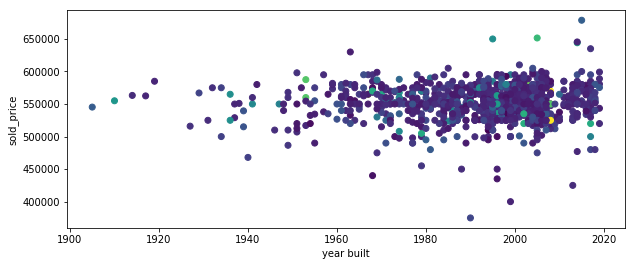

In [219]:
plt.figure(figsize=(10, 4))
plt.ylabel("sold_price")
plt.xlabel("year built")
plt.scatter(X_test[:,0],y_test,c=y_hat)
#plt.plot(X_test[:,0],y_hat,color='#FF0070')




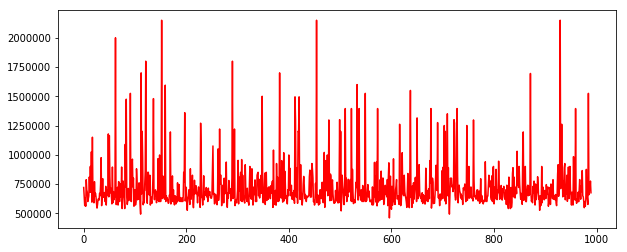

In [224]:
plt.figure(figsize=(10, 4))
plt.plot(y_hat,color="red")

In [155]:
def getMeanDifferences(y_hat,y_test):
    
    dif = np.zeros(len(y_hat))
    
    for i in range(0,len(y_test)):
        dif[i] = abs(y_hat[i] - y_test[i])
    
    return dif

In [156]:
a = getMeanDifferences(y_hat,y_test)
prediction = sum(a)/len(y_hat)
b = (prediction * 100) /df2['sold_price'].mean() 
print('Accuracy: ', 100-b)

Accuracy:  77.58347859842645


## Linear regression 

In [69]:
class Linear_Regression():
    def fit(self,X,y):
        self.w = np.linalg.solve(X.T@X,X.T@y)
    def predict(self,X):
        return np.matmul(X,self.w)

In [70]:
lin = Linear_Regression()

In [71]:
lin.fit(X_train,y_train)

In [72]:
y_hat1 = lin.predict(X_test)

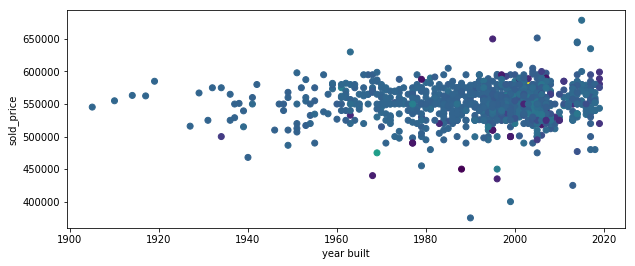

In [196]:
plt.figure(figsize=(10, 4))
plt.ylabel("sold_price")
plt.xlabel("year built")
plt.scatter(X_test[:,0],y_test,c=y_hat1)


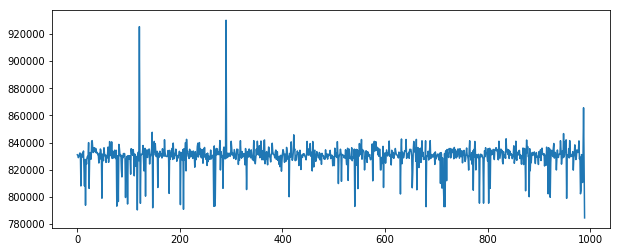

In [208]:
plt.figure(figsize=(10, 4))
plt.plot(y_hat1)

In [194]:
a = getMeanDifferences(y_hat1,y_test)
prediction = sum(a)/len(y_hat1)
b = (prediction * 100) /df2['sold_price'].mean() 
print('Accuracy: ', 100-b)

Accuracy:  64.0757402874875


In [75]:
def R2(Y,Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum(Y-np.mean(Y)**2)))

In [76]:
print(R2(y_test,y_hat))

1.2390909490234838


In [77]:
print(R2(y_test,y_hat1))

1.2574083929134636


## trying gradient descent 

In [78]:
#golbal helper function
def OLS(Y,Y_hat,N):
    return (1/(2*N))*np.sum((Y-Y_hat)**2)

def R_squared(Y,Y_hat):
    return (1 - (np.sum((Y-Y_hat)**2)/np.sum((Y - np.mean(Y))**2)))
    

In [185]:
class Our_Linear_Regression():
    
    def fit(self,X,y,epochs = 1e3,eta=1e-3,show_curve = False,lambd = 0,p = 1):
        
        #define epoch, epoch is the number of repeations we will use
        epoch = int(epochs)
            
        N,D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        J = np.zeros(epoch) #numpy array to plot later
        
        for epoch in range(epoch):
            Y_hat = self.predict(X)
            #objective calculation
            J[epoch] = OLS(Y,Y_hat,N)+(lambd/(p*N))*np.linalg.norm(self.W,ord=p,keepdims=True)
            #weight update rule, what happens to the weights every iteration
            self.W -= eta*(1/N)*(X.T@(Y_hat - Y) + (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("\mathcal(J)")
            plt.title("Training Curve")
            plt.show()
            
    def predict(self,X):
        return X@self.W

In [186]:
ols = Our_Linear_Regression()

In [187]:
x2 = X_train
y2 = y_train

C:\Users\Jay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in matmul
C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in matmul
C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


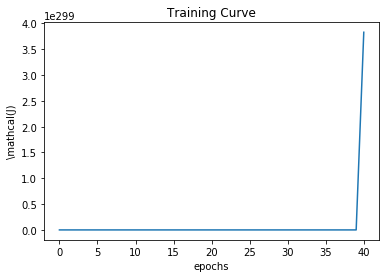

In [188]:
ols.fit(x2,y2,show_curve = True)